# **Chapter 2. Pandas 패키지 다루기**

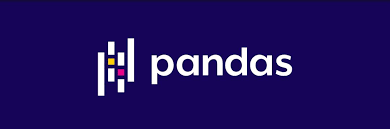

###  **Pandata 데이터의 특징**

> 앞선 시간에는 판다스의 기본적인 구조를 살펴보았습니다. 아래 그림과 같이 행과 열로 구성된 데이터는 key(열), value(열에 있는 값)로 불러올 수 있습니다. key, value를 활용하여 데이터에 접근하는 법을 배워보겠습니다.

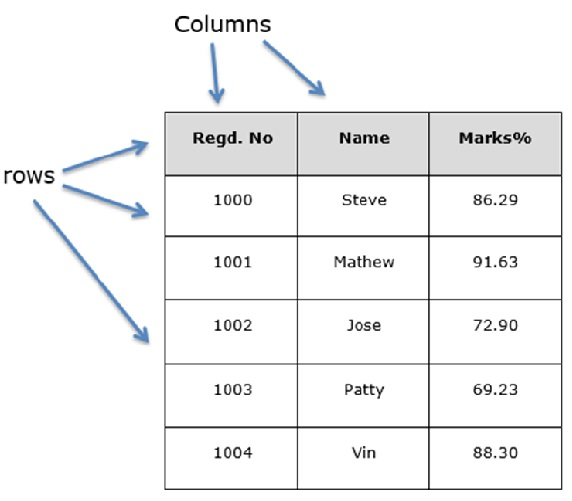

### **1. Key와 Value의 활용**
> 판다스는 딕셔너리와 마찬가지로 key, value로 이루어져 있으므로, Series와 DataFrame 데이터에서 원하는 value를 key로 불러와 보겠습니다. 판다스 데이터프레임에서 key는 열을, value는 열에 있는 모든 값을 의미합니다. </br>
> - 활용 방법1: df[원하는 key] 

>불러오고 싶은 열이 다수인 경우는 여러 key를 리스트로 넣어줍니다.</br>
> - 활용 방법2: df[[원하는 key1, 원하는 key2]] 

>불러온 열의 값을 불러올 때는 values라는 명령어를 활용합니다.</br>
> - 활용 방법2: df[원하는 key1].values


In [ ]:
# 판다스 패키지 불러오기
import pandas as pd

In [ ]:
# 예제 1 : 판다스 DataFrame 생성하기

# 딕셔너리를 활용하여 데이터프레임 생성하기
data = {'Region' : ['Korea', 'America', 'Chaina', 'Canada', 'Italy'],
        'Sales' : [300, 200, 500, 150, 50],
        'Amount' : [90, 80, 100, 30, 10],
        }
df = pd.DataFrame(data)
df

In [ ]:
# 에제 2 : 예제1에서 생성한 데이터에서 원하는 열의 데이터 조회하기

# 한 개의 열만 불러오기
print("한 개의 열만 불러오기")

print(df.Region)  # 'Region' 열을 출력합니다. 
print(df['Region'])  # 'Region' 열을 출력합니다. 


# 여러 개의 열을 한번에 불러오기
print("\n여러 개의 열을 한번에 불러오기")
print(df[['Region','Sales']])  # ['Region','Sales'] 두 열을 출력합니다. 

# 불러온 열의 값들을 불러오기
print("\n불어온 열의 값을 불러오기")
print(df['Region'].values)  # 'Region' 열의 값들을 출력합니다. 

#### **key로 원하는 열을 불러왔듯이 원하는 행을 기준으로 데이터를 불러올 수도 있습니다.**

> `loc`이나 `iloc`이라는 데이터의 속성을 통해서 불러올 수 있습니다.
> 활용 방법 : df.loc 또는 df.iloc

    먼저 데이터 구조는 아래와 같습니다. 행을 보니 index가 0부터 4까지 정수로 이루어져 있는 것을 볼 수 있습니다. 이제 0~4까지의 index값을 이용하여 데이터를 불러와 보겠습니다.

In [ ]:
# 데이터 구조 확인
df

In [ ]:
# 원하는 행 불러오기: loc(행 이름), iloc(행 인덱스)
print(df.loc[1]) # 행 이름이 1인 행이 출력됩니다. 
print(df.iloc[2])  # 행의 인덱스가 2인 행이 출력됩니다. 

# 여러 행을 불러오기
print(df.loc[1:3])  # 인덱스 슬라이싱과 유사한 방식으로 여러 행을 불러올 수 있습니다. 
print(df.iloc[1:3])

#### **여기서 잠깐!**
> 위에서 여러 행을 불러오는 코드의 실행 결과를 보면, `loc`가 `iloc`보다 한 줄 더 출력된 것을 확인할 수 있습니다. 
</br>`loc`은 [1:3]으로 인덱싱을 할 때 마지막 index를 포함하고, `iloc`은 포함하지 않기 때문입니다.

In [ ]:
# 예제 3 : 하나의 key에 여러 value가 저장된 딕셔너리로 DataFrame을 생성하고, 
#          원하는 행을 key와 loc를 활용하여 불러오기

data = {
        'Name' : ['Jane', 'Hana', 'Jonghan', 'Mark', 'Irin'],
        'Strawberry' : [100, 200, 50, 80, 20],
        'Apple' : [90, 80, 100, 30, 10],
        'Banana' : [10, 20, 10, 45, 60],
        }  # 딕셔너리를 선언해줍니다. 

df = pd.DataFrame(data) # 데이터 프레임을 만들어줍니다. 

# 원하는 행 불러오기
print(df.iloc[1:4])

print('\n')
# 여러 열을 불러오기
print(df[['Name', "Apple"]])

### **2. 판다스로 저장된 데이터 저장하고 불러오기**
> 판다스는 하드에 저장된 데이터나 웹사이트에 저장된 데이터를 곧바로 불러올 수 있습니다. 아래의 예제를 통해 웹에 저장된 데이터를 불러와보겠습니다.
> - (저장하기)활용 방법: df.to_csv(데이터 파일 경로) 
    - 데이터 프레임의 속성에는 `to_csv`가 있어서 이를 활용하여 저장할 수 있음을 볼 수 있습니다.
    - DataFrame에 어떤 인덱스 정보도 없을 때는 index=False라는 옵션을 주어 저장합니다.
        - (저장하기)활용 방법: df.to_csv(데이터 파일 경로, index=False) 
</br></br>
> - (불러오기)활용 방법: pd.read_csv(데이터 파일 경로)


In [ ]:
# 예제 4 : csv파일을 저장하고 불러오기

data = {
    "0": [4.1, 4, 4.4, 4.1, 3.8, 4.0, 4.1, 3.5, 3.8, 3.9, 4.1, 4.0],
    "1": [950, 1150, 900, 1250, 1100, 1250, 1100, 1250, 1150, 1350, 1400, 900],
    "2": [1100, 1300, 1250, 1500, 1550, 1100, 1450, 1550, 1500, 1500, 1350, 1400],
    "3": [1250, 1800, 1550, 1800, 1650, 1250, 1800, 1650, 1800, 1550, 1250, 1500],
    "4": [1100, 1900, 1650, 2100, 1800, 1650, 1850, 1900, 1900, 1650, 1550, 1400],
    "5": [1400, 2150, 1650, 1800, 1700, 1800, 1950, 2100, 1800, 1750, 1750, 1350],
}

df = pd.DataFrame(data)

# 데이터 저장하기
data_path = "./price_list.csv"
df.to_csv(data_path, index=False) 
df

In [ ]:
# 저장된 csv파일 불러오기
df = pd.read_csv(data_path)
df

### **3. 판다스 데이터 프레임의 기본적인 속성**
> - df.head: 상위 5개만 출력합니다.
> - df.tail: 하위 5개만 출력합니다.
> - df.columns: 모든 열의 이름 또는 정보를 출력합니다.
> - df.index: 모든 행의 이름 또는 정보를 출력합니다.
>
#### 판다스 DataFrame은 노트북 셀 단위로 출력하는 것이 데이터를 읽기에 훨씬 용이하므로 명령어 하나씩 출력해보겠습니다.

In [ ]:
# 예제 5 : head, tail, columns, index 활용하여 데이터 출력하기

df.head() # 상위 5개 출력

In [ ]:
# tail

df.tail() # 총 행의 개수가 11개인 것을 확인할 수 있습니다.

In [ ]:
# 열과 행의 정보를 출력
print("인덱스: ", df.index)
print("열: ", df.columns)

- 위 출력에서 RangeIndex라는 것이 눈에 띕니다. RangeIndex란 앞선 시간에서 다루었던 range나 np.arange 함수와 매우 유사한 구조를 가집니다. RangeIndex로 이루어진 인덱스는 start값부터 시작하여 stop-step까지 step만큼의 일정 간격으로 구성된 숫자로 구성됩니다.
> 따라서 RangeIndex(start=0, stop=506, step=1) 인덱스는 0부터 505까지의 인덱스를 나타냅니다.

### **4. 판다스 데이터 프레임 수정**

> 판다스 데이터프레임의 열과 행을 df.columns, df.index의 값을 아래의 그림처럼 직접 바꾸어서 설정할 수 있습니다.

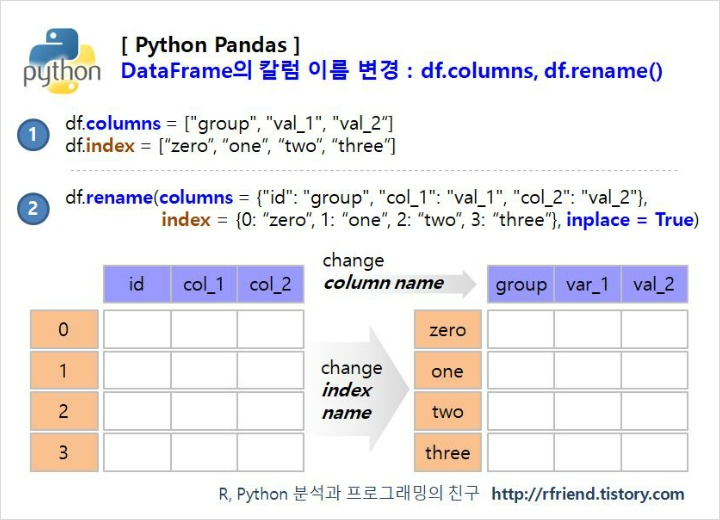

In [ ]:
# 예제 6 : 열과 행의 정보를 업데이트 해보기

# 각 열의 이름을 아래와 같이 바꾸어보기
column_list = ["선호도", "2017", "2018", "2019", "2020", "2021"]  # 원하는 열 이름으로 이루어진 리스트를 미리 만들어 놓습니다. 
df.columns = column_list  # 미리 만든 리스트로 열 이름을 변경합니다. 
df.head() #처음 다섯줄을 출력합니다. 

In [ ]:
# 특정 column만 선택해보기
index_list = ["사과", "배", "바나나", "오렌지", "석류", "모과", 
              "매실", "무화과", "복숭아", "대추", "포도", "귤"] # 원하는 행의 이름을 리스트로 저장합니다.
df.index = index_list # 해당 리스트로 indexing합니다.
df.head()

#### **판다스는 원하는 인덱스의 열을 별도로 지정하여 데이터를 조회할 수 있습니다.**
> 활용 방법 : `df[원하는 열 인덱스 이름]` 혹은 다수의 열을 지정할 경우 `df[원하는 열 인덱스 리스트]`

In [ ]:
# 예제 7 : 원하는 열을 선택하여 상위 몇 개만 출력해보기

index_list = ["2017", "2018"]
df[index_list].head(3)  # 2017, 2018 열의 맨 처음 3개 행만 불러옵니다. 

#### **df.rename 함수를 활용하여 한번에 열과 행의 인덱스 바꾸기**
> 위의 그림에 나와있듯 데이터프레임 변수 안에 있는 rename이라는 속성을 통해서 열과 행의 정보를 한번에 바꿀 수 있습니다.
> - df.rename은 그림처럼 딕셔너리를 받습니다. key는 기존값을, value에는 새로 바꿀 값을 넣어줍니다.

In [ ]:
# 원래 데이터 불러오기
df = pd.read_csv("./price_list.csv")
df

In [ ]:
# 딕셔너리로 새로 바꿀 값 입력하기
df = df.rename(columns={'0': '선호도', '1': '2017', '2': '2018', '3': '2019', '4': '2020', '5': '2021'}, 
               index={0: '사과',
                      1: '배',
                      2: '바나나',
                      3: '오렌지',
                      4: '석류',
                      5: '모과',
                      6: '매실',
                      7: '무화과',
                      8: '복숭아',
                      9: '대추',
                      10: '포도',
                      11: '귤'})  # key가 원래 이름. value가 변경할 이름인 딕셔너리를 넣어줍니다. 
df

#### **Numpy 배열의 경우는 `[1:4]`이런식으로 인덱싱(indexing)을 하여 값을 불러올 수 있었습니다. 판다스도 이러한 인덱싱이 가능합니다.**

> 활용 방법: 리스트나 배열과 동일하게 [m:n]형태로 인덱싱합니다. 이때 판다스는 행을 인덱싱합니다.

In [ ]:
# 예제 8 : 배열처럼 indexing 해보기

m = 2
n = 5
df[m:n] # 2, 3, 4행을 출력

#### **Pandas는 행과 열의 인덱스 정보의 교환이 매우 자유롭습니다. 따라서, 특정 열의 값을 행의 인덱스로 대체할 수 있습니다.**

> 활용 방법 : df.index = df[원하는 열의 인덱스]
> - 참고: 아래 예제에서는 특정 열을 삭제하는 명령어인 `del`이 활용됩니다. del 명령어는 `del 삭제하기 원하는 열` 과 같이 사용하며, 지정한 열을 삭제해줍니다.

In [ ]:
# 예제 9 : 인덱스를 "선호도" 열의 값으로 대체하기

df.index = df['선호도'] # 선호도를 인덱스로 지정
del df['선호도'] # 원래 있던 선호도 열은 삭제합니다. del 명령어 뒤에 해당하는 열을 써줍니다.
df

In [ ]:
# 예제 10 : 인덱스를 0부터 시작하는 정수로 바꾸기

index_list = list(range(len(df))) # df의 길이만큼 0부터 시작하는 정수의 리스트를 생성하기
print("인덱스 리스트: ", index_list)

df.index = index_list
df # '선호도' 열은 삭제된 것을 확인할 수 있습니다.